In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from pandas import DatetimeIndex
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

pd.set_option('display.max_columns', 500)

%matplotlib inline

ModuleNotFoundError: No module named 'plotly'

# Data Loading


In [7]:
df = pd.read_csv('diabetes_data.csv') 

### Data Exploration

In [8]:
print("Este dataset possui  {} colunas e {} linhas".format(df.shape[1],df.shape[0]))

Este dataset possui  18 colunas e 70692 linhas


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70692 entries, 0 to 70691
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Age                   70692 non-null  float64
 1   Sex                   70692 non-null  float64
 2   HighChol              70692 non-null  float64
 3   CholCheck             70692 non-null  float64
 4   BMI                   70692 non-null  float64
 5   Smoker                70692 non-null  float64
 6   HeartDiseaseorAttack  70692 non-null  float64
 7   PhysActivity          70692 non-null  float64
 8   Fruits                70692 non-null  float64
 9   Veggies               70692 non-null  float64
 10  HvyAlcoholConsump     70692 non-null  float64
 11  GenHlth               70692 non-null  float64
 12  MentHlth              70692 non-null  float64
 13  PhysHlth              70692 non-null  float64
 14  DiffWalk              70692 non-null  float64
 15  Stroke             

In [10]:
df.head(2)

,Age,Sex,HighChol,CholCheck,BMI,Smoker,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,GenHlth,MentHlth,PhysHlth,DiffWalk,Stroke,HighBP,Diabetes
0,4.0,1.0,0.0,1.0,26.0,0.0,0.0,1.0,0.0,1.0,0.0,3.0,5.0,30.0,0.0,0.0,1.0,0.0
1,12.0,1.0,1.0,1.0,26.0,1.0,0.0,0.0,1.0,0.0,0.0,3.0,0.0,0.0,0.0,1.0,1.0,0.0


In [11]:
print(df['Diabetes'].value_counts())


Diabetes
0.0    35346
1.0    35346
Name: count, dtype: int64


In [12]:
for col in df:
    print(f'{col}: {df[col].unique()}')

Age: [ 4. 12. 13. 11.  8.  1.  6.  3.  7. 10.  9.  5.  2.]
Sex: [1. 0.]
HighChol: [0. 1.]
CholCheck: [1. 0.]
BMI: [26. 28. 29. 18. 31. 32. 27. 24. 21. 58. 30. 20. 22. 38. 40. 25. 36. 47.
 19. 37. 41. 23. 34. 35. 42. 17. 33. 44. 15. 52. 69. 56. 45. 39. 92. 53.
 98. 50. 46. 79. 48. 16. 63. 72. 54. 49. 68. 43. 84. 73. 76. 55. 51. 75.
 57. 60. 12. 77. 82. 67. 71. 61. 14. 81. 59. 86. 13. 87. 65. 95. 89. 62.
 64. 66. 85. 70. 83. 80. 78. 74.]
Smoker: [0. 1.]
HeartDiseaseorAttack: [0. 1.]
PhysActivity: [1. 0.]
Fruits: [0. 1.]
Veggies: [1. 0.]
HvyAlcoholConsump: [0. 1.]
GenHlth: [3. 1. 2. 4. 5.]
MentHlth: [ 5.  0.  7.  3.  4.  2. 30. 20.  1. 15. 10. 25. 14. 28.  6. 29. 26. 12.
 16. 22. 13.  8.  9. 21. 18. 17. 27. 24. 23. 11. 19.]
PhysHlth: [30.  0. 10.  3.  6.  4. 15.  1.  2. 14.  7. 25. 21. 20.  5.  8. 22. 23.
 29. 12. 18. 28. 26. 24. 27. 11. 13. 16. 17.  9. 19.]
DiffWalk: [0. 1.]
Stroke: [0. 1.]
HighBP: [1. 0.]
Diabetes: [0. 1.]


In [14]:
fig = make_subplots(
    rows=3, cols=6, subplot_titles=("Age", "Sex",
                                    "HighChol","CholCheck",
                                    "BMI", "Smoker",
                                    'HeartDiseaseorAttack', 'PhysActivity',
                                    'Fruits','Veggies',
                                    'HvyAlcoholConsump', 'GenHlth',
                                    'MentHlth', 'PhysHlth',
                                    'DiffWalk', 'Stroke',
                                    'HighBP', 'Diabetes'),
    specs=[[{"type": "domain"}, {"type": "domain"},{"type": "domain"}, {"type": "domain"},{"type": "domain"}, {"type": "domain"}],
       [{"type": "domain"}, {"type": "domain"},{"type": "domain"}, {"type": "domain"},{"type": "domain"}, {"type": "domain"}],
       [{"type": "domain"}, {"type": "domain"},{"type": "domain"}, {"type": "domain"},{"type": "domain"}, {"type": "domain"}]],
)

colours = ['#FF0000', '#FFFF00', '#FFA500', '#DA70D6']

fig.add_trace(go.Pie(labels=np.array(df['Age'].value_counts().index),
                     values=[x for x in df['Age'].value_counts()], hole=.35,
                     textinfo='label+percent', rotation=-45, marker_colors=colours),
              row=1, col=1)


fig.add_trace(go.Pie(labels=np.array(df['Sex'].value_counts().index),
                     values=[x for x in df['Sex'].value_counts()], hole=.35,
                     textinfo='label+percent', marker_colors=colours),
              row=1, col=2)


fig.add_trace(go.Pie(labels=np.array(df['HighChol'].value_counts().index),
                     values=[x for x in df['HighChol'].value_counts()], hole=.35,
                     textinfo='label+percent', rotation=-45, marker_colors=colours),
              row=1, col=3)

fig.add_trace(go.Pie(labels=np.array(df['CholCheck'].value_counts().index),
                     values=[x for x in df['CholCheck'].value_counts()], hole=.35,
                     textinfo='label+percent', rotation=-45, marker_colors=colours),
              row=1, col=4)

fig.add_trace(go.Pie(labels=np.array(df['BMI'].value_counts().index),
                     values=[x for x in df['BMI'].value_counts()], hole=.35,
                     textinfo='label+percent', marker_colors=colours),
              row=1, col=5)

fig.add_trace(go.Pie(labels=np.array(df['Smoker'].value_counts().index),
                     values=[x for x in df['Smoker'].value_counts()], hole=.35,
                     textinfo='label+percent', marker_colors=colours),
              row=1, col=6)

fig.add_trace(go.Pie(labels=np.array(df['HeartDiseaseorAttack'].value_counts().index),
                     values=[x for x in df['HeartDiseaseorAttack'].value_counts()], hole=.35,
                     textinfo='label+percent', rotation=-45, marker_colors=colours),
              row=2, col=1)

fig.add_trace(go.Pie(labels=np.array(df['PhysActivity'].value_counts().index),
                     values=[x for x in df['PhysActivity'].value_counts()], hole=.35,
                     textinfo='label+percent', marker_colors=colours),
              row=2, col=2)

fig.add_trace(go.Pie(labels=np.array(df['Fruits'].value_counts().index),
                     values=[x for x in df['Fruits'].value_counts()], hole=.35,
                     textinfo='label+percent', rotation=-45, marker_colors=colours),
              row=2, col=3)

fig.add_trace(go.Pie(labels=np.array(df['Veggies'].value_counts().index),
                     values=[x for x in df['Veggies'].value_counts()], hole=.35,
                     textinfo='label+percent', marker_colors=colours),
              row=2, col=4)

fig.add_trace(go.Pie(labels=np.array(df['HvyAlcoholConsump'].value_counts().index),
                     values=[x for x in df['HvyAlcoholConsump'].value_counts()], hole=.35,
                     textinfo='label+percent', rotation=-45, marker_colors=colours),
              row=2, col=5)

fig.add_trace(go.Pie(labels=np.array(df['GenHlth'].value_counts().index),
                     values=[x for x in df['GenHlth'].value_counts()], hole=.35,
                     textinfo='label+percent', rotation=-45, marker_colors=colours),
              row=2, col=6)

fig.add_trace(go.Pie(labels=np.array(df['MentHlth'].value_counts().index),
                     values=[x for x in df['MentHlth'].value_counts()], hole=.35,
                     textinfo='label+percent', rotation=-45, marker_colors=colours),
              row=3, col=1)

fig.add_trace(go.Pie(labels=np.array(df['PhysHlth'].value_counts().index),
                     values=[x for x in df['PhysHlth'].value_counts()], hole=.35,
                     textinfo='label+percent', rotation=-45, marker_colors=colours),
              row=3, col=2)

fig.add_trace(go.Pie(labels=np.array(df['DiffWalk'].value_counts().index),
                     values=[x for x in df['DiffWalk'].value_counts()], hole=.35,
                     textinfo='label+percent', rotation=-45, marker_colors=colours),
              row=3, col=3)

fig.add_trace(go.Pie(labels=np.array(df['Stroke'].value_counts().index),
                     values=[x for x in df['Stroke'].value_counts()], hole=.35,
                     textinfo='label+percent', rotation=-45, marker_colors=colours),
              row=3, col=4)

fig.add_trace(go.Pie(labels=np.array(df['HighBP'].value_counts().index),
                     values=[x for x in df['HighBP'].value_counts()], hole=.35,
                     textinfo='label+percent', rotation=-45, marker_colors=colours),
              row=3, col=5)

fig.add_trace(go.Pie(labels=np.array(df['Diabetes'].value_counts().index),
                     values=[x for x in df['Diabetes'].value_counts()], hole=.35,
                     textinfo='label+percent', rotation=-45, marker_colors=colours),
              row=3, col=6)




fig.update_layout(height=1500, font=dict(size=15), showlegend=False)

fig.show()

NameError: name 'make_subplots' is not defined

## Null values

In [15]:
print(df.isna().sum())

Age                     0
Sex                     0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Stroke                  0
HighBP                  0
Diabetes                0
dtype: int64


## Duplicate rows


In [18]:

print(df.duplicated().sum())
df.drop_duplicates()

6672


,Age,Sex,HighChol,CholCheck,BMI,Smoker,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,GenHlth,MentHlth,PhysHlth,DiffWalk,Stroke,HighBP,Diabetes
0,4.0,1.0,0.0,1.0,26.0,0.0,0.0,1.0,0.0,1.0,0.0,3.0,5.0,30.0,0.0,0.0,1.0,0.0
1,12.0,1.0,1.0,1.0,26.0,1.0,0.0,0.0,1.0,0.0,0.0,3.0,0.0,0.0,0.0,1.0,1.0,0.0
2,13.0,1.0,0.0,1.0,26.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,10.0,0.0,0.0,0.0,0.0
3,11.0,1.0,1.0,1.0,28.0,1.0,0.0,1.0,1.0,1.0,0.0,3.0,0.0,3.0,0.0,0.0,1.0,0.0
4,8.0,0.0,0.0,1.0,29.0,1.0,0.0,1.0,1.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70687,6.0,0.0,1.0,1.0,37.0,0.0,0.0,0.0,0.0,1.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,1.0
70688,10.0,1.0,1.0,1.0,29.0,1.0,1.0,0.0,1.0,1.0,0.0,2.0,0.0,0.0,1.0,0.0,0.0,1.0
70689,13.0,0.0,1.0,1.0,25.0,0.0,1.0,0.0,1.0,0.0,0.0,5.0,15.0,0.0,1.0,0.0,1.0,1.0
70690,11.0,0.0,1.0,1.0,18.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,1.0,0.0,1.0,1.0


## Binning

In [33]:
def hist_plots(df):
    plt.figure(figsize=(10,4))
    plt.hist(df)
    plt.title("Histogram Plot")
    plt.show()

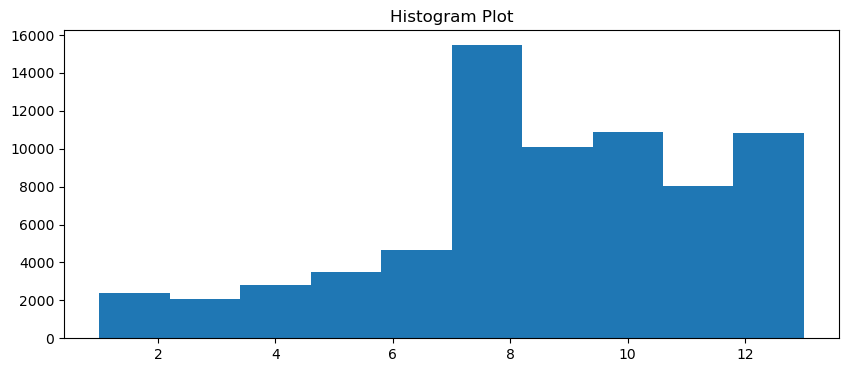

In [34]:
hist_plots(df['Age'])

c:\Users\Utilizador\miniconda3\envs\envNAME\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead



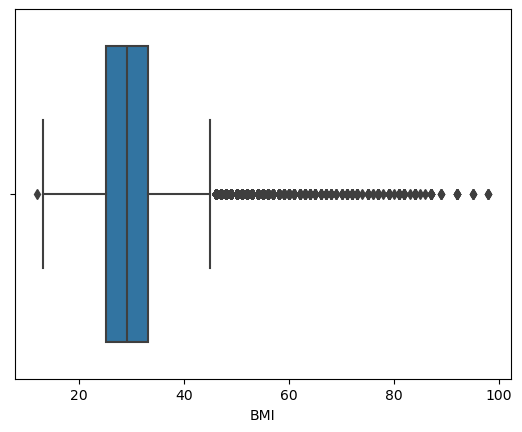

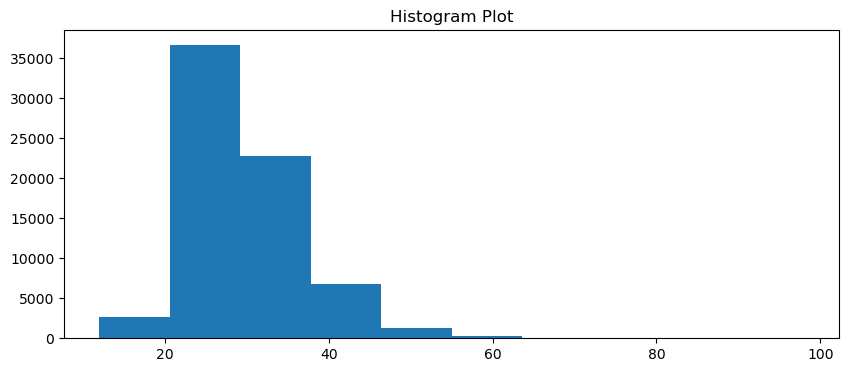

In [35]:
sns.boxplot(x=df['BMI'])
hist_plots(df['BMI'])

c:\Users\Utilizador\miniconda3\envs\envNAME\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

c:\Users\Utilizador\miniconda3\envs\envNAME\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

c:\Users\Utilizador\miniconda3\envs\envNAME\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead



<Axes: xlabel='GenHlth', ylabel='count'>

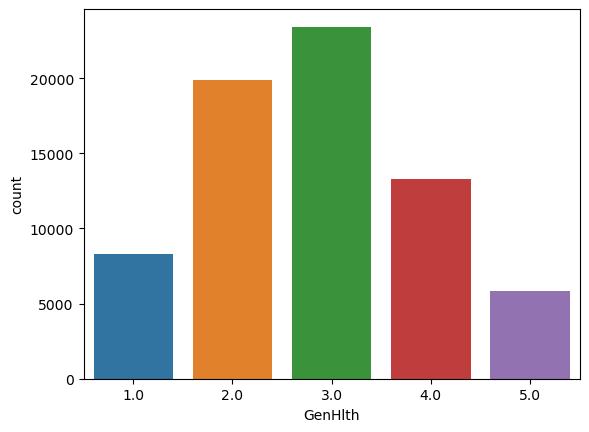

In [36]:
sns.countplot(x=df['GenHlth'])

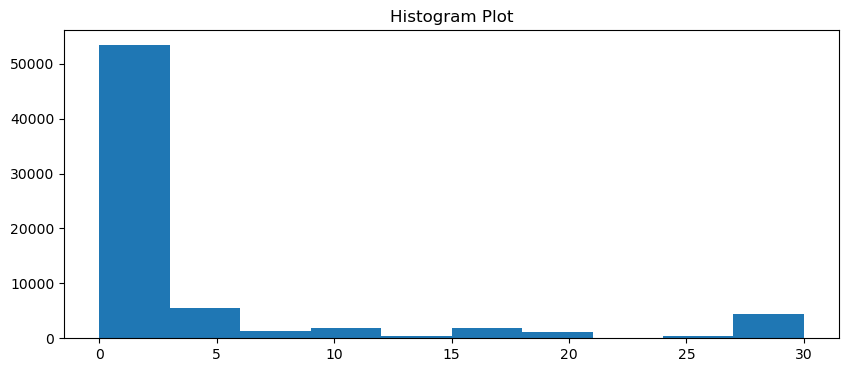

In [38]:
#sns.countplot(x=df['MentHlth'])
hist_plots(df['MentHlth'])

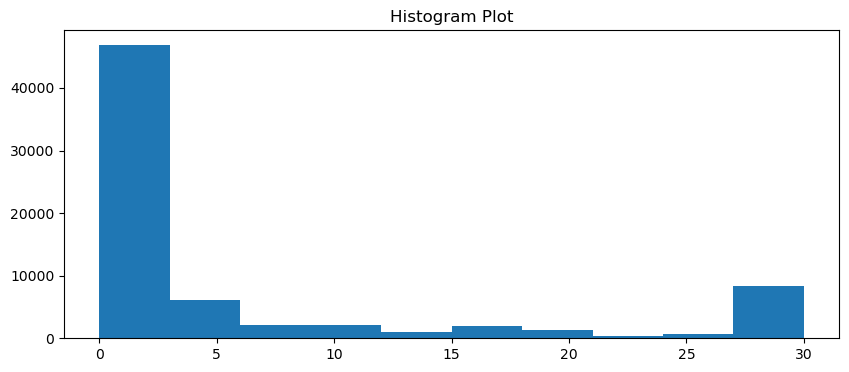

In [39]:
hist_plots(df['PhysHlth'])

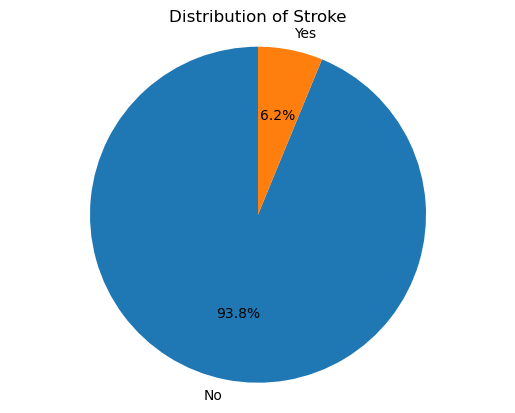

In [65]:
def plot_pie(data, labels):
    fig, ax = plt.subplots()
    ax.pie(data, labels=labels, autopct='%1.1f%%', startangle=90)
    ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
    plt.title('Distribution of Stroke in Dataset')

data = df['Stroke'].value_counts()
labels = ["No", "Yes"]
plot_pie(data, labels)
plt.show()

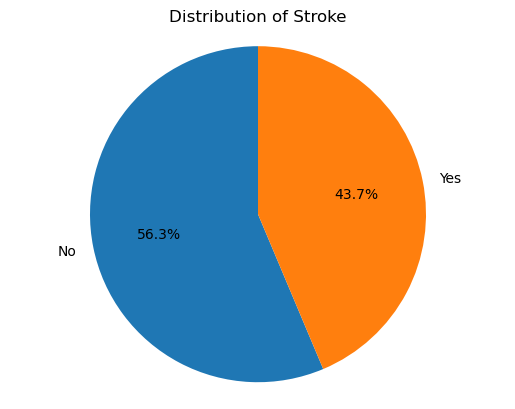

In [67]:
def plot_pie(data, labels):
    fig, ax = plt.subplots()
    ax.pie(data, labels=labels, autopct='%1.1f%%', startangle=90)
    ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
    plt.title('Distribution of HighBP in Dataset')

data = df['HighBP'].value_counts()
labels = ["No", "Yes"]
plot_pie(data, labels)
plt.show()             

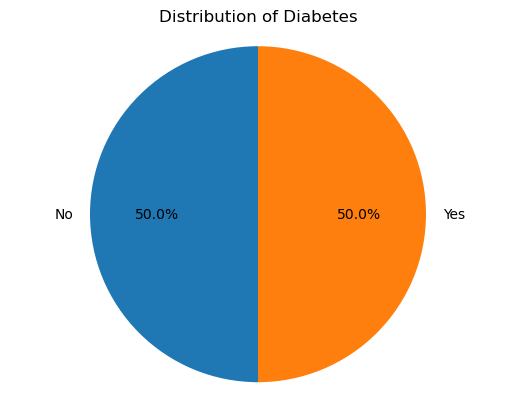

In [68]:
def plot_pie(data, labels):
    fig, ax = plt.subplots()
    ax.pie(data, labels=labels, autopct='%1.1f%%', startangle=90)
    ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
    plt.title('Distribution of Diabetes in Dataset')

data = df['Diabetes'].value_counts()
labels = ["No", "Yes"]
plot_pie(data, labels)
plt.show()                   